In [1]:
import level_sets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

colors = [['#cf4c34','#078752','#6333ed','#d6ca54','#0ca0ad','#2ea62a','#c96b0d','#d947bb'],\
          ['#4C1C13','#073824','#000000','#000000','#000000','#000000','#000000','#000000'],\
          ['#FF745A','#0BD480','#EEEEEE','#EEEEEE','#EEEEEE','#EEEEEE','#EEEEEE','#EEEEEE']]
fontProperties = {'family':'sans-serif','serif':['Palatino'],'sans-serif':['Gill Sans'],
    'weight' : 'normal', 'size' : 12}
plt.rc('text', usetex=True)
plt.rc('font',**fontProperties)

In [2]:
learnedSafety = level_sets.LevelSetFunction("dubins_reachset.json")

In [3]:
learnedSafety.gdx

array([ 0.25      ,  0.25      ,  0.14959965])

In [4]:
posx=-3.7
learnedSafety.value([-3.7,-4,0.1])

2.9526168298299718

/Users/david.mcpherson/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


/Users/david.mcpherson/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


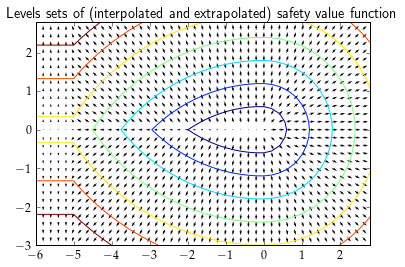

In [5]:
def f(x,y):
    return(learnedSafety.value([x,y,0]) )

delta = 0.2
x = np.arange(-6.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
z = np.array([learnedSafety.value([ex,ey,0]) for ex,ey in zip(X.flatten(),Y.flatten())])
Z = z.reshape(X.shape)
#Z = [learnedSafety.value([x,y,0]) for x,y in zip(X,Y)]
#Z = sliceSafety(X, Y)

u = np.array([learnedSafety.gradient([ex,ey,0])[0] for ex,ey in zip(X.flatten(),Y.flatten())])
U = u.reshape(X.shape)
v = np.array([learnedSafety.gradient([ex,ey,0])[1] for ex,ey in zip(X.flatten(),Y.flatten())])
V = v.reshape(X.shape)

plt.figure()
CS = plt.contour(X, Y, Z)
plt.quiver(X,Y, U,V)
#plt.clabel(CS, inline=1, fontsize=10)
plt.title('Levels sets of (interpolated and extrapolated) safety value function')

In [7]:
recoX =  np.array([ex for ex,ey in zip(X.flatten(),Y.flatten())])
frumpter = (X == recoX.reshape(X.shape))
frumpter.all()

True

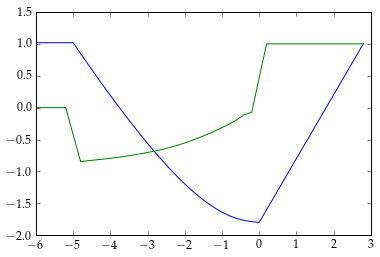

In [7]:
vals = np.array([learnedSafety.value([ex,0,0]) for ex in x])
grads = np.array([learnedSafety.gradient([ex,0,0])[0] for ex in x])
plt.figure()
plt.plot(x,vals)
plt.plot(x,grads)

In [41]:
# Prototyping the periodicity indexing logic

#data = np.array(learnedSafety.levelSetObject["data"])
data = learnedSafety.data
index = [10,71,50]
print(index)
for ii,periodicity in enumerate(learnedSafety.gperiodicity):
    maxIndex = learnedSafety.gN[ii]
    if periodicity:
        index[ii] = index[ii] - (index[ii] >=  maxIndex) *  maxIndex + (index[ii] < 0) *  maxIndex
        print(index)
    else:
        if (index[ii] >=  maxIndex):
            index[ii] = maxIndex - 1
        if (index[ii] < 0):
            index[ii] = 0
        print(index)
data[tuple(index)]

[10, 71, 50]
[10, 71, 50]
[10, 64, 50]
[10, 64, 8]


6.9800857725993453

In [32]:
queryState = [-3.7,-4,0.1]
np.array([queryState[ii]+difference/2 for ii,difference in enumerate(self.gdx)])

array([65, 65, 42])

In [13]:
queryState = [-3.7,-4,0.1]

gradient = np.zeros(learnedSafety.dim)
for ii,difference in enumerate(learnedSafety.gdx):
    offset = np.zeros(learnedSafety.dim)
    offset[ii] = difference/2
    gradient[ii] = (learnedSafety.value(queryState + offset) - learnedSafety.value(queryState - offset))/difference
gradient

array([-0.23247865, -0.96746235, -2.64793997])

In [ ]:
import json
from pprint import pprint

with open('dubins_reachset.json') as f:
    data = json.load(f)
    
data["gmin"]